In [1]:
import pathlib
import sys
import os

# Hacky way to get to root package
if "notebooks" in os.getcwd():
    os.chdir("..")

In [2]:
%load_ext autoreload
%autoreload 2
    
import sys
from data_container import load_scouted_data, load_pit_data
import pandas as pd
import numpy as np
import plotly.express as px
pd.set_option('display.max_columns', None)

In [3]:
scouted_data = load_scouted_data()
scouted_data

,Scouter Initials,Match Number,Team Number,No Show,Auto Fuel,Auto Climbing Status,Auto Human Player Score,Teleop Fuel,Teleop Human Player Score,Teleop Fuel Passed,Endgame Climbing Level
0,abc,1,1678,False,14,True,12,49,27,18,L2
1,abc,1,3504,False,27,False,2,12,48,14,NaN
2,abc,1,8393,False,15,True,4,189,132,40,L1
3,abc,1,118,True,2,True,2,112,26,33,L3
4,abc,1,254,False,3,False,9,35,82,38,L2
5,abc,1,67,True,16,False,14,96,185,37,L3
6,abc,2,2056,False,7,False,10,190,32,21,NaN
7,abc,2,118,True,10,False,15,153,49,39,L2
8,abc,2,8393,True,3,True,14,64,105,14,NaN
9,abc,2,3504,True,30,True,2,38,108,2,L3


In [4]:
pit_data = load_pit_data()
pit_data

,Scouter Initials,Team Number,Intake,Climbing Level (Auto),Climbing Level (Endgame),Auto Start,Piece Auto,Climb type,Over Bumper?,Under Trench?,Carrying Capacity,Preload Number,Defense Skill (0-5)
0,abc,3504,Ground,1,1,right,16,in,True,False,8,8,2
1,abc,8393,Depot,0,2,right,6,in,False,True,12,6,1
2,abc,67,Ground,1,3,middle,3,out,True,True,6,3,4
3,abc,1678,Human Player Station,0,1,left,8,out,False,True,10,4,3
4,abc,118,Ground,1,1,left,0,in,True,True,10,0,5
5,abc,254,Human Player Station,1,0,middle,8,out,False,True,8,8,1
6,abc,2056,Depot,1,0,left,9,out,True,False,12,8,2


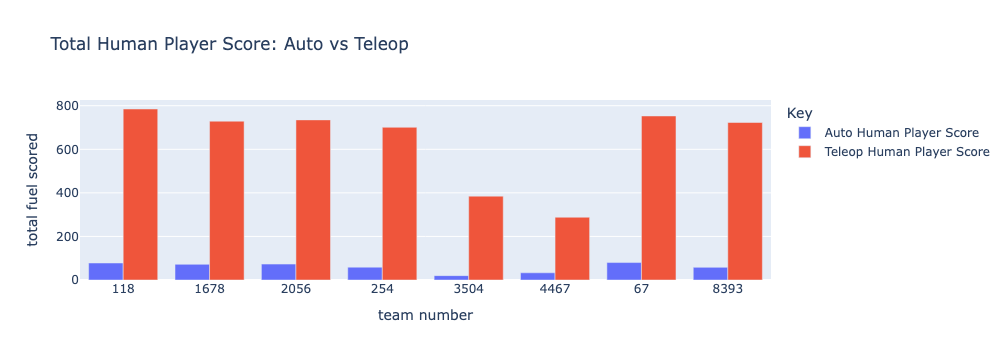

In [5]:
auto_hp_fuel_df = scouted_data.groupby("Team Number")["Auto Human Player Score"].sum().reset_index()
teleop_hp_fuel_df = scouted_data.groupby("Team Number")["Teleop Human Player Score"].sum().reset_index()

# Merging them together
combined_df = auto_hp_fuel_df.merge(teleop_hp_fuel_df, on="Team Number")

# Creates bar chart with both columns
fig = px.bar(combined_df, 
             x="Team Number", 
             y=["Auto Human Player Score", "Teleop Human Player Score"], 
             title="Total Human Player Score: Auto vs Teleop",
             labels={"Team Number": "team number", 
                     "value": "total fuel scored",
                     "variable": "Key"},
             barmode="group")  # This makes bars side-by-side instead of stacked
fig.show()

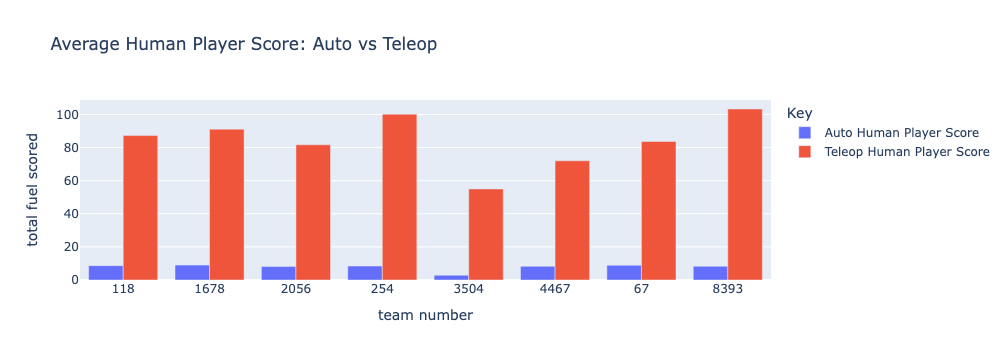

In [6]:
auto_hp_fuel_df = scouted_data.groupby("Team Number")["Auto Human Player Score"].mean().reset_index()
teleop_hp_fuel_df = scouted_data.groupby("Team Number")["Teleop Human Player Score"].mean().reset_index()

combined_df = auto_hp_fuel_df.merge(teleop_hp_fuel_df, on="Team Number")

fig = px.bar(combined_df, 
             x="Team Number", 
             y=["Auto Human Player Score", "Teleop Human Player Score"], 
             title="Average Human Player Score: Auto vs Teleop",
             labels={"Team Number": "team number", 
                     "value": "total fuel scored",
                     "variable": "Key"},
             barmode="group") 
fig.show()

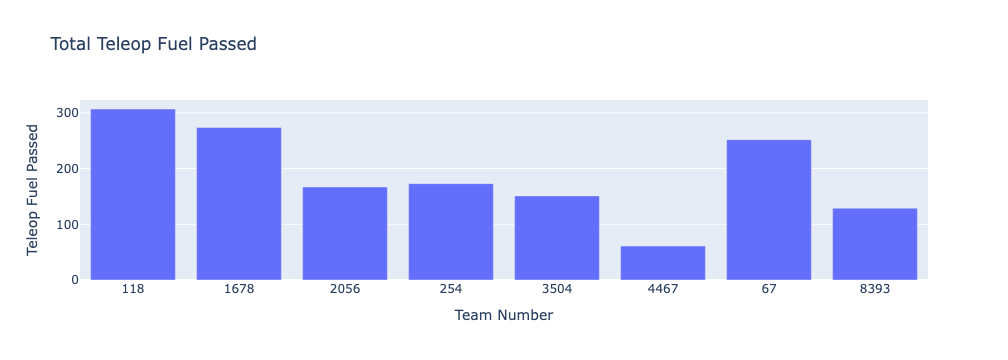

In [9]:
teleop_fuel_passed_df = scouted_data.groupby("Team Number")["Teleop Fuel Passed"].sum().reset_index()
fig = px.bar(teleop_fuel_passed_df, x="Team Number", y="Teleop Fuel Passed", title="Total Teleop Fuel Passed", 
             labels={"Total Teleop Fuel Passed": "total fuel passed"})
fig.show()

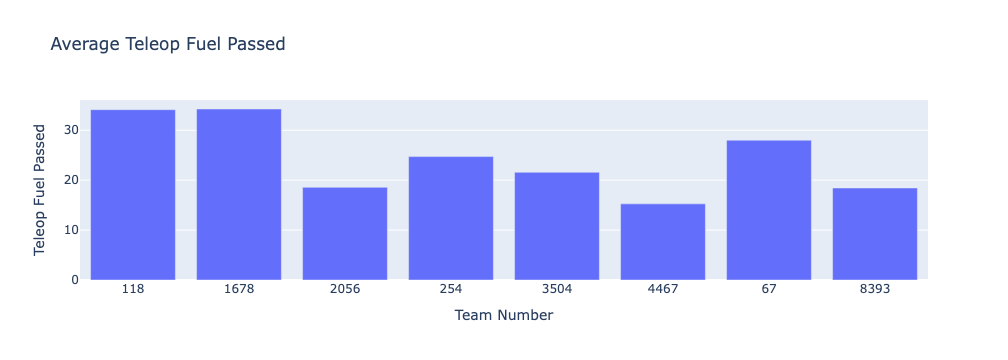

In [11]:
teleop_fuel_passed_df = scouted_data.groupby("Team Number")["Teleop Fuel Passed"].mean().reset_index()
fig = px.bar(teleop_fuel_passed_df, x="Team Number", y="Teleop Fuel Passed", title="Average Teleop Fuel Passed", 
             labels={"Total Teleop Fuel Passed": "total fuel passed"})
fig.show()